In [404]:
import astropy
from astropy.io import fits
from matplotlib import pyplot as plt

In [405]:
import numpy as np
import sys

In [406]:
np.set_printoptions(threshold=sys.maxsize)

In [407]:
fits_file = "member.uid___A001_X2fb_X200.ari_l.Betelgeuse_sci.spw0_1_2_3_4_338083MHz.12m.cont.I.pbcor.fits"

hdu = fits.open(fits_file, mode= 'update')
data = fits.getdata(fits_file)

In [408]:
highfile = "hr_member.uid___A001_X2de_Xf7.ari_l.Betelgeuse_sci.spw0_1_2_3_4_338086MHz.12m.cont.I.pbcor.fits"

hduhr = fits.open(highfile, mode= 'update')
datahr = fits.getdata(highfile)

(434.0, 444.0)

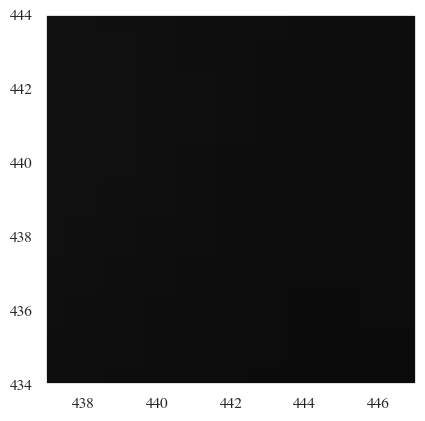

In [409]:
w = 5

plt.imshow(datahr[0,0,:,:], cmap = 'gray')

# center on ds9 at (443.04628, 439.97236)
# note: this appears to be different than the dataset
x = 442
y = 439


plt.xlim(x-w, x+w)
plt.ylim(y-w, y+w)

look better in ds9

In [410]:
data.shape

(1, 1, 882, 882)

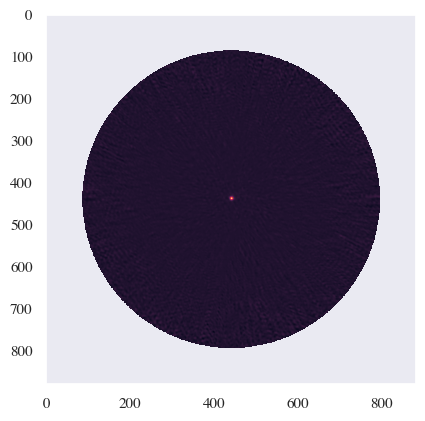

In [411]:
w = 2

plt.imshow(data[0,0,:,:])

# center on ds9 at (443.04628, 439.97236)
# note: this appears to be different than the dataset
x = 442
y = 439


#plt.xlim(x-w, x+w)
#plt.ylim(y-w, y+w)

In [412]:
data[442:,]

array([], shape=(0, 1, 882, 882), dtype=float32)

In [413]:
from matplotlib import gridspec
import seaborn as sns


## using photoutils instead

In [414]:
import photutils

In [415]:
from photutils.centroids import centroid_quadratic

from photutils.profiles import RadialProfile

In [416]:
d2 = data[0,0,:,:]

In [417]:
w=10
xycen = centroid_quadratic(d2, xpeak=x, ypeak=y)
edge_radii = np.arange(w)

rp = RadialProfile(d2, xycen, edge_radii)

In [418]:
dhr = datahr[0,0,:,:]

In [423]:
dhr[x-w:x+w,y-w:y+w]

array([[-2.67632742e-04, -2.18821660e-04, -1.39085882e-04,
        -4.54422807e-05,  2.05469382e-06, -2.18888872e-05,
        -2.65346280e-05,  2.70003529e-05,  4.80252129e-05,
         5.90375676e-05, -2.08776032e-06, -1.74099478e-04,
        -4.17341944e-04, -6.29623595e-04, -7.11261120e-04,
        -6.61861151e-04, -4.53035318e-04, -3.17498401e-04,
        -3.21744505e-04, -2.95081758e-04],
       [-7.24156926e-05,  9.10749077e-06,  5.57033563e-05,
         1.63992037e-04,  1.96022695e-04,  1.30886488e-04,
         4.17261399e-05,  4.61736017e-05,  9.62572158e-05,
         1.17913485e-04,  9.58640085e-05, -6.46711051e-05,
        -2.77708750e-04, -4.60728625e-04, -5.93199977e-04,
        -6.25349057e-04, -5.34165185e-04, -4.18357202e-04,
        -3.61562881e-04, -2.91387842e-04],
       [ 1.57677321e-04,  2.99158652e-04,  3.01899418e-04,
         3.53189302e-04,  3.93882394e-04,  3.55434575e-04,
         2.53835315e-04,  1.88382706e-04,  2.17150111e-04,
         2.12309809e-04,  1.4

In [424]:
w=10
xycenhr = centroid_quadratic(dhr, xpeak=x, ypeak=y)
edge_radiihr = np.arange(w)

rphr = RadialProfile(dhr, xycenhr, edge_radiihr)

In [425]:
plt.plot(rphr.profile)

ValueError: 'positions' must not contain any non-finite (e.g., NaN or inf) positions

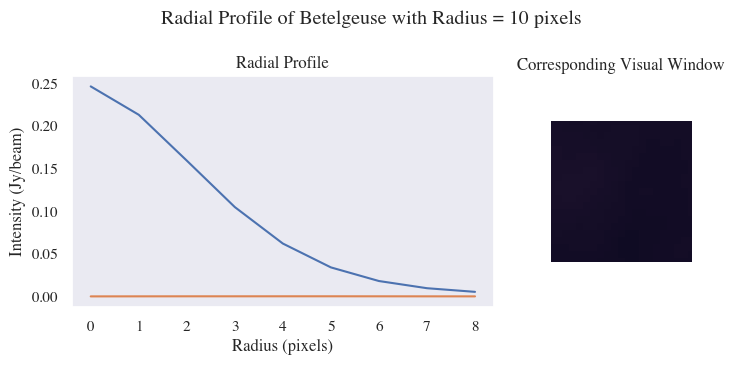

In [386]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(8)
plt.rcParams["font.family"] = "Times"

spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[3, 1], hspace = 0.5, wspace = 0.2)

ax1 = fig.add_subplot(spec[0])
ax2 = fig.add_subplot(spec[1])

fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)
ax1.plot(rp.profile)
ax1.plot(rphr.profile)
ax1.set_title("Radial Profile")
ax2.imshow(datahr[0,0,:,:])
ax2.set_xlim(x-w, x+w)
ax2.set_ylim(y-w, y+w)
ax2.set_title("Corresponding Visual Window", y=1.3)
ax1.set_xlabel("Radius (pixels)")
ax1.set_ylabel("Intensity (Jy/beam)")
ax2.axis("off")

sns.set_style("dark")


(0.23, 0.234)

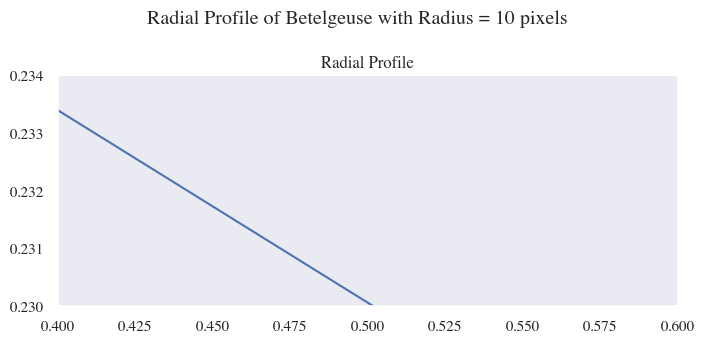

In [387]:
fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(8)
plt.rcParams["font.family"] = "Times"

spec = gridspec.GridSpec(ncols=1, nrows=1)

fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)
ax1 = fig.add_subplot(spec[0])

ax1.plot(rp.profile)
ax1.plot(rphr.profile)
ax1.set_title("Radial Profile")

ax1.set_xlim(0.4, 0.6)
ax1.set_ylim(0.23, 0.234)

In [263]:
def radial_profile(w, x=442, y=439, data=data):
    
    ######## calculate
    
    radii = []

    for i in range(x,x+w,1): # 442 to the end
        for j in range(y,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)

            if r not in radii:
                radii.append(r)
    
    radii.sort()
    
    intensity = [0]*len(radii)

    for i in range(x,x+w,1): # 442 to the end
        for j in range(y,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)

            intensity[radii.index(r)] += data[0,0,i,j]

    ######## plot
    
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(8)
    plt.rcParams["font.family"] = "Times"

    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[3, 1], hspace = 0.5, wspace = 0.2)
    
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])
    
    fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)
    ax1.plot(radii,intensity)
    ax1.set_title("Radial Profile")
    ax2.imshow(data[0,0,:,:])
    ax2.set_xlim(x-w, x+w)
    ax2.set_ylim(y-w, y+w)
    ax2.set_title("Corresponding Visual Window", y=1.3)
    ax1.set_xlabel("Radius (pixels)")
    ax1.set_ylabel("Intensity (Jy/beam)")
    ax2.axis("off")
    
    sns.set_style("dark")

    

In [ ]:
data[0,0,i,j]

In [282]:
np.max(data)

nan

In [279]:
def radial_profile2(w, x=442, y=439, data=data):
    
    ######## calculate
    
    radii = []

    #finding radii
    for i in range(x-w,x+w,1): # 442 to the end
        for j in range(y-w,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)

            if r not in radii:
                radii.append(r)
    
    radii.sort()
    
    sum_intensity = [0]*len(radii)
    counts = [0]*len(radii)
    avg_intensity = [0]*len(radii)
    

    for i in range(x-w,x+w,1): # 442 to the end
        for j in range(y-w,y+w,1): # 339 to the end
            r = np.sqrt((x-i)**2+(y-j)**2)
            
            sum_intensity[radii.index(r)] += data[0,0,i,j]
            counts[radii.index(r)] += 1
            
    for i in range(len(avg_intensity)):
        avg_intensity[i] = sum_intensity[i]/counts[i]

    ######## plot
    
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(8)
    plt.rcParams["font.family"] = "Times"

    spec = gridspec.GridSpec(ncols=2, nrows=1,width_ratios=[3, 1], hspace = 0.5, wspace = 0.2)
    
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])
    
    fig.suptitle(f'Radial Profile of Betelgeuse with Radius = {w} pixels', y =1.1)
    ax1.plot(radii,avg_intensity)
    ax1.set_title("Radial Profile")
    ax2.imshow(data[0,0,:,:])
    ax2.set_xlim(x-w, x+w)
    ax2.set_ylim(y-w, y+w)
    ax2.set_title("Corresponding Visual Window", y=1.3)
    ax1.set_xlabel("Radius (pixels)")
    ax1.set_ylabel("Intensity (Jy/beam)")
    ax2.axis("off")
    
    sns.set_style("dark")

    

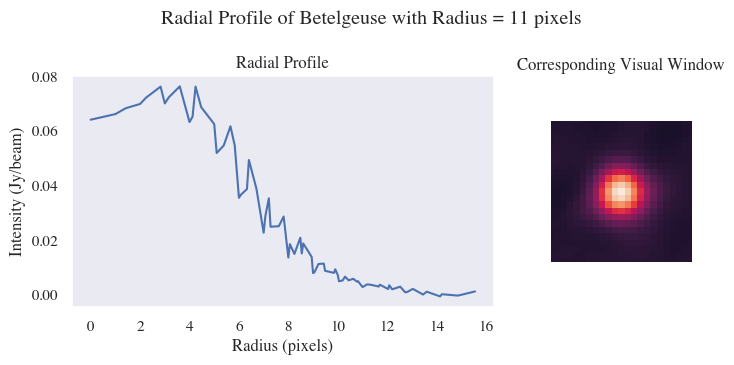

In [292]:
radial_profile2(11,442,439)

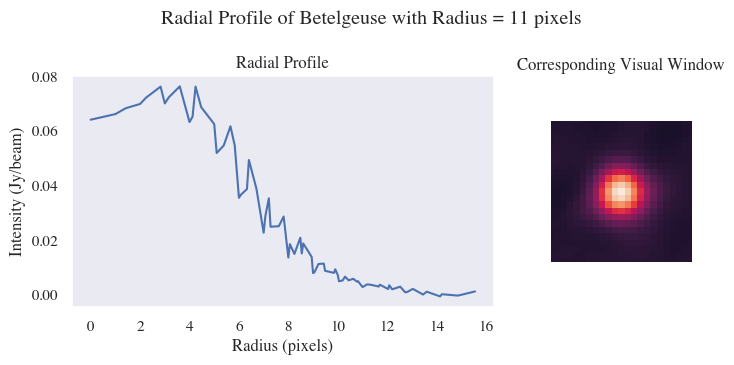

In [340]:
radial_profile2(11,442,439, data = datahr)

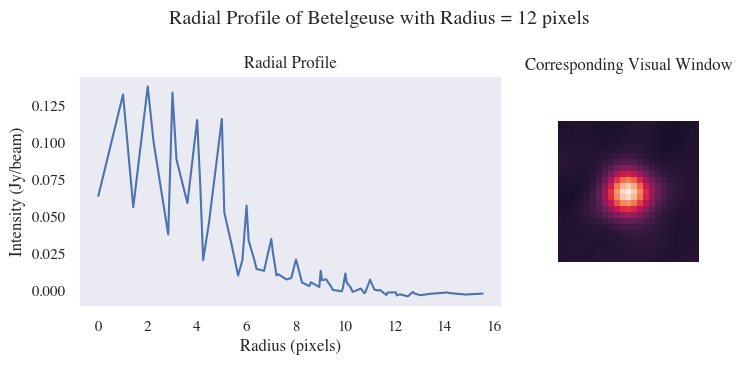

In [265]:
radial_profile(12)

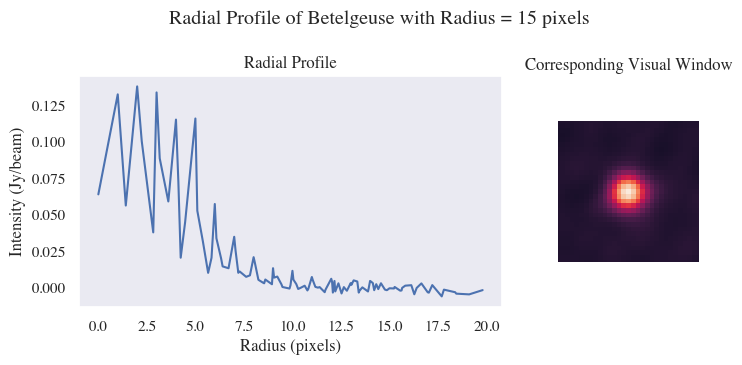

In [266]:
radial_profile(15)

In [ ]:
def radial_profile_list(w, x=442, y=439, data=data):
    
    radlist = [None]*len(w)
    intlist = [None]*len(w)
    
    ######## calculate
    c = 0
    
    for i in w:
        
        radii = []

        for i in range(x,x+w,1): # 442 to the end
            for j in range(y,y+w,1): # 339 to the end
                r = np.sqrt((x-i)**2+(y-j)**2)

                if r not in radii:
                    radii.append(r)

        radii.sort()

        intensity = [0]*len(radii)

        for i in range(x,x+w,1): # 442 to the end
            for j in range(y,y+w,1): # 339 to the end
                r = np.sqrt((x-i)**2+(y-j)**2)

                intensity[radii.index(r)] += data[0,0,i,j]
                
        radlist[c] = radii
        intlist[c] = intensity
        c+=1

    ######## plot
    
    fig = plt.figure()
    fig.set_figheight(3)
    fig.set_figwidth(8)
    plt.rcParams["font.family"] = "Times"

    spec = gridspec.GridSpec(ncols=2, nrows=3,width_ratios=[3, 1], hspace = 0.5, wspace = 0.2)
    
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])
    
    fig.suptitle(f'Radius = {w}', y =1.1)
    ax1.plot(radii,intensity)
    ax1.set_title("Radial Profile")
    ax2.imshow(data[0,0,:,:])
    ax2.set_xlim(x-w, x+w)
    ax2.set_ylim(y-w, y+w)
    ax2.set_title("Corresponding Visual Window", y=1.3)
    ax1.set_xlabel("Radius (pixels)")
    ax1.set_ylabel("Intensity (Jy/beam)")
    ax2.axis("off")
    
    sns.set_style("dark")

    